# Tweeter Gender Classifier using Support Vector Machine
<br>*Analisis Gender berdasarkan Text Twitter
<br>dataset : https://www.kaggle.com/datasets/crowdflower/twitter-user-gender-classification

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('data/hasil_prepocessing.csv')
data

,Unnamed: 0,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,...,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone,text_clean,text_StopWord,description_clean,description_StopWord
0,0,815719226,0,0,3,10/26/2015 23:24,male,1.0000,1,1.0,...,NaN,110964,10/26/2015 12:40,6.590000e+17,main; @Kan1shk3,Chennai,robbie responds critics after against eddie ed...,robbie responds critics eddie edwards worldtit...,sing rhythm,sing rhythm
1,1,815719227,0,0,3,10/26/2015 23:30,male,1.0000,1,1.0,...,NaN,7471,10/26/2015 12:40,6.590000e+17,NaN,Eastern Time (US & Canada),felt like they were friends living story with ...,felt like friends living story retired,author novels filled with family drama romance,author novels filled family drama romance
2,2,815719228,0,0,3,10/26/2015 23:33,male,0.6625,1,1.0,...,NaN,5617,10/26/2015 12:40,6.590000e+17,clcncl,Belgrade,absolutely adore when louis starts songs hits ...,absolutely adore louis starts songs hits hard ...,louis whining squealing,louis whining squealing
3,3,815719229,0,0,3,10/26/2015 23:10,male,1.0000,1,1.0,...,NaN,1693,10/26/2015 12:40,6.590000e+17,"Palo Alto, CA",Pacific Time (US & Canada),looking dont typically advanced user,looking dont typically advanced user,mobile shazam google kleiner perkins yahoo spr...,mobile shazam google kleiner perkins yahoo spr...
4,4,815719230,0,0,3,10/27/2015 1:15,female,1.0000,1,1.0,...,NaN,31462,10/26/2015 12:40,6.590000e+17,NaN,NaN,watching neighbours catching with neighbs,watching neighbours catching neighbs,ricky wilson best frontmankaiser chiefs best b...,ricky wilson best frontmankaiser chiefs best b...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20045,20045,815757572,1,1,259,NaN,female,1.0000,1,1.0,...,NaN,783,10/26/2015 13:20,6.590000e+17,Verona ªÁ,NaN,fine drink love,fine drink love,NaN,NaN
20046,20046,815757681,1,1,248,NaN,male,1.0000,1,1.0,...,NaN,13523,10/26/2015 12:40,6.590000e+17,"Kansas City, MO",NaN,greg hardy good player dont face bryant learn ...,greg hardy good player dont face bryant learn ...,whatever like problem chargernation foreverroy...,whatever like problem chargernation foreverroy...
20047,20047,815757830,1,1,264,NaN,male,1.0000,1,1.0,...,NaN,26419,10/26/2015 13:20,6.590000e+17,Lagos Nigeria,NaN,miss people still never want them again,miss people still never want,teambarcelona look lost should follow follow y...,teambarcelona look lost follow follow heart br...
20048,20048,815757921,1,1,250,NaN,female,0.8489,1,1.0,...,NaN,56073,10/26/2015 12:40,6.590000e+17,Texas Hill Country,NaN,noticed your tendency carpet didnt want anything,noticed tendency carpet didnt want anything,antistatist homeschool kids aspiring thoughtle...,antistatist homeschool kids aspiring thoughtle...


In [ ]:
data.astype('string')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             20050 non-null  int64  
 1   _unit_id               20050 non-null  int64  
 2   _golden                20050 non-null  int64  
 3   _unit_state            20050 non-null  int64  
 4   _trusted_judgments     20050 non-null  int64  
 5   _last_judgment_at      20000 non-null  object 
 6   gender                 20050 non-null  object 
 7   gender:confidence      20024 non-null  float64
 8   profile_yn             20050 non-null  int64  
 9   profile_yn:confidence  20050 non-null  float64
 10  created                20050 non-null  object 
 11  description            16306 non-null  object 
 12  fav_number             20050 non-null  int64  
 13  gender_gold            50 non-null     object 
 14  link_color             20050 non-null  object 
 15  na

In [ ]:
data['text_StopWord'].fillna('unknown')
data.isna().sum(axis=0)

Unnamed: 0                   0
_unit_id                     0
_golden                      0
_unit_state                  0
_trusted_judgments           0
_last_judgment_at           50
gender                       0
gender:confidence           26
profile_yn                   0
profile_yn:confidence        0
created                      0
description               3744
fav_number                   0
gender_gold              20000
link_color                   0
name                         0
profile_yn_gold          20000
profileimage                 0
retweet_count                0
sidebar_color                0
text                         0
tweet_coord              19891
tweet_count                  0
tweet_created                0
tweet_id                     0
tweet_location            7485
user_timezone             7798
text_clean                  20
text_StopWord               41
description_clean         4235
description_StopWord      4272
dtype: int64

Visualisasi data

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='gender', ylabel='count'>

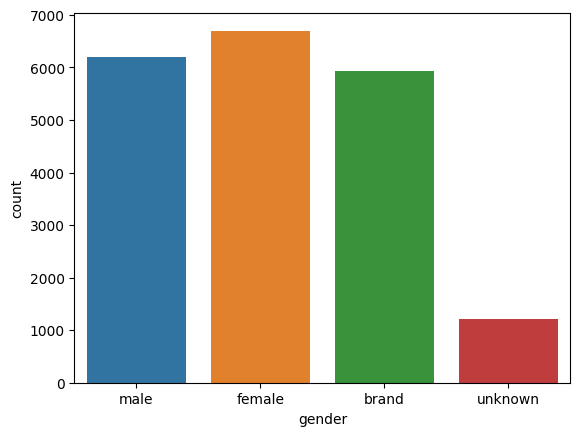

In [ ]:
sns.countplot(x='gender', data=data)

In [ ]:
data['text_StopWord'].astype(str)
data

,Unnamed: 0,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,...,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone,text_clean,text_StopWord,description_clean,description_StopWord
0,0,815719226,0,0,3,10/26/2015 23:24,male,1.0000,1,1.0,...,NaN,110964,10/26/2015 12:40,6.590000e+17,main; @Kan1shk3,Chennai,robbie responds critics after against eddie ed...,robbie responds critics eddie edwards worldtit...,sing rhythm,sing rhythm
1,1,815719227,0,0,3,10/26/2015 23:30,male,1.0000,1,1.0,...,NaN,7471,10/26/2015 12:40,6.590000e+17,NaN,Eastern Time (US & Canada),felt like they were friends living story with ...,felt like friends living story retired,author novels filled with family drama romance,author novels filled family drama romance
2,2,815719228,0,0,3,10/26/2015 23:33,male,0.6625,1,1.0,...,NaN,5617,10/26/2015 12:40,6.590000e+17,clcncl,Belgrade,absolutely adore when louis starts songs hits ...,absolutely adore louis starts songs hits hard ...,louis whining squealing,louis whining squealing
3,3,815719229,0,0,3,10/26/2015 23:10,male,1.0000,1,1.0,...,NaN,1693,10/26/2015 12:40,6.590000e+17,"Palo Alto, CA",Pacific Time (US & Canada),looking dont typically advanced user,looking dont typically advanced user,mobile shazam google kleiner perkins yahoo spr...,mobile shazam google kleiner perkins yahoo spr...
4,4,815719230,0,0,3,10/27/2015 1:15,female,1.0000,1,1.0,...,NaN,31462,10/26/2015 12:40,6.590000e+17,NaN,NaN,watching neighbours catching with neighbs,watching neighbours catching neighbs,ricky wilson best frontmankaiser chiefs best b...,ricky wilson best frontmankaiser chiefs best b...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20045,20045,815757572,1,1,259,NaN,female,1.0000,1,1.0,...,NaN,783,10/26/2015 13:20,6.590000e+17,Verona ªÁ,NaN,fine drink love,fine drink love,NaN,NaN
20046,20046,815757681,1,1,248,NaN,male,1.0000,1,1.0,...,NaN,13523,10/26/2015 12:40,6.590000e+17,"Kansas City, MO",NaN,greg hardy good player dont face bryant learn ...,greg hardy good player dont face bryant learn ...,whatever like problem chargernation foreverroy...,whatever like problem chargernation foreverroy...
20047,20047,815757830,1,1,264,NaN,male,1.0000,1,1.0,...,NaN,26419,10/26/2015 13:20,6.590000e+17,Lagos Nigeria,NaN,miss people still never want them again,miss people still never want,teambarcelona look lost should follow follow y...,teambarcelona look lost follow follow heart br...
20048,20048,815757921,1,1,250,NaN,female,0.8489,1,1.0,...,NaN,56073,10/26/2015 12:40,6.590000e+17,Texas Hill Country,NaN,noticed your tendency carpet didnt want anything,noticed tendency carpet didnt want anything,antistatist homeschool kids aspiring thoughtle...,antistatist homeschool kids aspiring thoughtle...


Split Dataset

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

In [ ]:
#untuk mengetahui baris dan kolom
data.shape

(20050, 31)

In [ ]:
#terdapat 19.953 data yang bisa digunakan
#data displit menjadi 80% = 15.962 data training dan 20% = 3.991
#dengan x = text twitter dan y = gender

train_x, test_x, train_y, test_y = train_test_split(data['text_StopWord'], data['gender'], test_size=0.1, random_state = 0)

In [ ]:
#melihat data training
data_train = pd.DataFrame()
data_train['text'] = train_x
data_train['text'] = data_train['text'].astype(str)
data_train['gender'] = train_y

data_train

,text,gender
5280,weather updates weather channel,brand
2619,moves penisgf force awakens,male
8296,spinnin rules scene lets spin guyss,male
3488,nan,female
5438,omgi sitting rancho lady across speaking mouth...,female
...,...,...
13123,interested webinar measuring impact qualitativ...,brand
19648,first time behind dodged spoilers caught depre...,male
9845,inwa cutebt thered sweetie,female
10799,dwayne wade proved time time never count,male


In [ ]:
data_train.to_csv('data/training_data_text.csv', index = False)

In [ ]:
#data test
data_test = pd.DataFrame()
data_test['text'] = test_x
data_test['gender'] = test_y

data_test

,text,gender
9772,forget genderqueer flag doesnt mean everyone f...,male
15945,goes along technology pins video games really ...,male
19021,everydayiloveyou forevermoreand makes lastpush...,female
134,photo snow queen vlad barbe kids family snow q...,male
14816,emily said outfit makes look like dystopian sh...,female
...,...,...
15675,poor service unable telecommute work option area,unknown
11236,gone days would friends,female
6073,smart home movement gaining momentum estimated...,brand
3599,tears trades captain chronicling mets wild rid...,brand


In [ ]:
data_test.to_csv('data/test_data_text.csv', index = False)

In [ ]:
print("Dataset untuk training\t:", data_train.shape)
print("Dataset untuk test\t:", data_test.shape)

Dataset untuk training	: (18045, 2)
Dataset untuk test	: (2005, 2)


In [ ]:
data['text_StopWord'] = data['text_StopWord'].fillna('')
data_test['text'] = data_test['text'].fillna('')
data_train['text'] = data_train['text'].fillna('')

Algoritma SVM (TF-IDF)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn import svm
from sklearn.metrics import classification_report

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_train_x = ''
tfidf_test_x = ''

tfidf = TfidfVectorizer(max_features = 500000)
tfidf.fit(data['text_StopWord'])
tfidf_train_x = tfidf.transform(data_train['text'])
tfidf_test_x = tfidf.transform(data_test['text'])

In [ ]:
tfidf

TfidfVectorizer(max_features=500000)

In [ ]:
from sklearn.svm import SVC

model = SVC(kernel='linear', C=1)
model.fit(tfidf_train_x, train_y)

SVC(C=1, kernel='linear')

In [ ]:
# Proses Pengujian

from sklearn.metrics import accuracy_score

prediction = model.predict(tfidf_test_x)
test_predict = pd.DataFrame()
test_predict['text'] = test_x
test_predict['gender'] = prediction
accuracy = accuracy_score(prediction, test_y)*100
accuracy = round(accuracy,1)

In [ ]:
test_predict

,text,gender
9772,forget genderqueer flag doesnt mean everyone f...,male
15945,goes along technology pins video games really ...,female
19021,everydayiloveyou forevermoreand makes lastpush...,female
134,photo snow queen vlad barbe kids family snow q...,brand
14816,emily said outfit makes look like dystopian sh...,female
...,...,...
15675,poor service unable telecommute work option area,male
11236,gone days would friends,female
6073,smart home movement gaining momentum estimated...,male
3599,tears trades captain chronicling mets wild rid...,male


In [ ]:
data_test['gender'].astype('string')
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2005 entries, 9772 to 16659
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2005 non-null   object
 1   gender  2005 non-null   object
dtypes: object(2)
memory usage: 47.0+ KB


In [ ]:
print('nilai akurasi\t: ', accuracy)

nilai akurasi	:  50.9


In [ ]:
# Accuracy, Precision, Recall, f1-score

from sklearn.metrics import classification_report

print ("\nHere is the classification report:")
print (classification_report(test_y, prediction))


Here is the classification report:
              precision    recall  f1-score   support

       brand       0.62      0.58      0.60       601
      female       0.47      0.61      0.53       630
        male       0.45      0.44      0.44       650
     unknown       1.00      0.02      0.05       124

    accuracy                           0.51      2005
   macro avg       0.64      0.41      0.41      2005
weighted avg       0.54      0.51      0.49      2005



In [ ]:
from sklearn.metrics import confusion_matrix
print('Nilai Confussion Matrix\t:')
matrix = confusion_matrix(test_y, prediction)
print(matrix)

Nilai Confussion Matrix	:
[[349 115 137   0]
 [ 79 384 167   0]
 [103 263 284   0]
 [ 31  47  43   3]]


Visualisasi Data

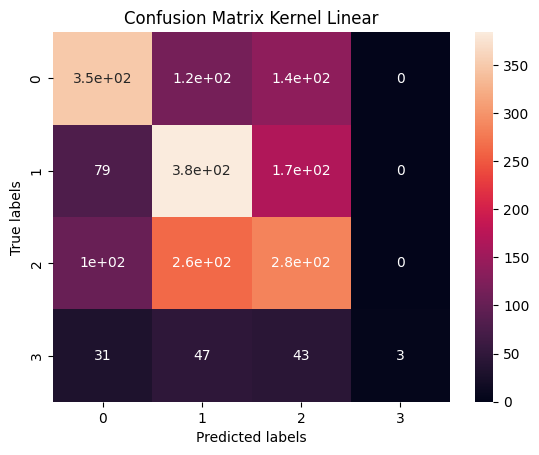

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

ax= plt.subplot()
cm = matrix

sns.heatmap(cm, annot=True, ax = ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix Kernel Linear');

Text(0.5, 1.0, 'Jumlah Gender dalam Data Training')

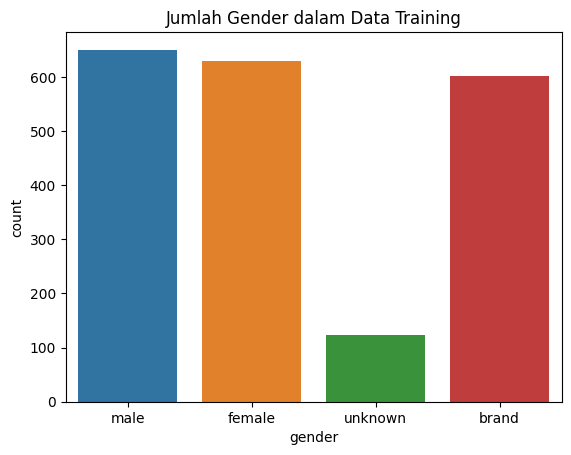

In [ ]:
sns.countplot(x='gender',data=data_test)
plt.title('Jumlah Gender dalam Data Training')

Text(0.5, 1.0, 'Jumlah Gender dalam Data Prediksi')

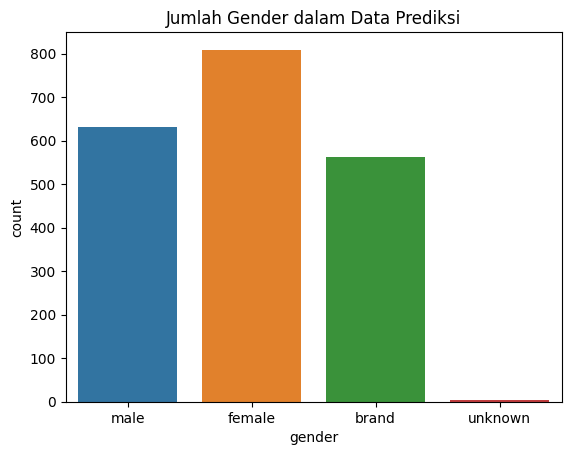

In [ ]:
sns.countplot(x='gender',data=test_predict)
plt.title('Jumlah Gender dalam Data Prediksi')